# Utilization Pilot Analysis

## Cleaning and Pre Proccessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 40) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 200) #replace n with the number of rows you want to see completely
sns.set_theme(style="darkgrid")

In [2]:

#Read in dataset
utilization_df = pd.read_csv('Utilization Pilot - Intern Data Points Exercise.csv')

#Check correct import with excel
print(utilization_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Account_name                    603 non-null    object 
 1   Edition/Platform Hybrid         603 non-null    object 
 2   Effective_Contract_Date         603 non-null    object 
 3   Implementation Service Manager  603 non-null    object 
 4   Activation Coach                603 non-null    object 
 5   Project_name                    603 non-null    object 
 6   Service Type                    603 non-null    object 
 7   Activation Experience           603 non-null    object 
 8   Implementation_Status__c        603 non-null    object 
 9   Transition_to_CS_Date           603 non-null    object 
 10  HPP                             603 non-null    float64
 11  DTV                             603 non-null    int64  
 12  Trans CS Year-Month             603 

In [3]:
#Check rows and imports
utilization_df.head(3)

,Account_name,Edition/Platform Hybrid,Effective_Contract_Date,Implementation Service Manager,Activation Coach,Project_name,Service Type,Activation Experience,Implementation_Status__c,Transition_to_CS_Date,HPP,DTV,Trans CS Year-Month,Trans CS Year-Quarter,Group Simple,In Pilot Description,Sept'22 Trans Qty,Oct'22\nTrans Qty,Nov'22\nTrans Qty,Dec'22\nTrans Qty,Jan'23\nTrans Qty,Feb'23\nTrans Qty,Mar'23\nTrans Qty,Sept'22 Max Commitment,Oct'22\nMax Commitment,Nov'22\nMax Commitment,Dec'22\nMax Commitment,Jan'23\nMax Commitment,Feb'23\nMax Commitment,Mar'23\nMax Commitment,Sept'22 Utilization,Oct'22\nUtilization,Nov'22\nUtilization,Dec'22\nUtilization,Jan'23\nUtilization,Feb'23\nUtilization,Mar'23\nUtilization
0,FAAC Entrance Solutions UK Ltd,Standard (Universal),9/1/22,Bill Montgomery,Jahanara Yesmin,FAAC Entrance Solutions U - Expense,Expense,Express,Complete,1/23/23,14.05,144,2023-01,2023-1,SMB UK,Control Group,0,0,3,11,62,103,62,0,0,100,100,100,100,100,0%,0%,3%,11%,62%,103%,62%
1,Joe Taylor Restoration Inc,Standard,9/1/22,PJ Schoeny,PJ Schoeny,Joe Taylor Restoration In - Expense,Expense,Guided Workshop,Complete,2/3/23,0.00,155,2023-02,2023-1,SMB SB,Control Group,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,Stride Property Group,Standard (Universal),9/1/22,Daryll Aldwin Sales,Diana Chris Mantua,Stride Property Group - Expense,Expense,1:1 Directed,Complete,1/27/23,33.50,148,2023-01,2023-1,SMB Australia,Control Group,0,0,7,4,14,24,18,0,0,40,40,40,40,40,0%,0%,18%,10%,35%,60%,45%


In [4]:
#Clean column names
char_remov= ['/', ' ', '-','_',"'",'\n']

for char in char_remov:
    utilization_df.columns = utilization_df.columns.str.replace(char,'')

print(utilization_df.columns)


Index(['Accountname', 'EditionPlatformHybrid', 'EffectiveContractDate',
       'ImplementationServiceManager', 'ActivationCoach', 'Projectname',
       'ServiceType', 'ActivationExperience', 'ImplementationStatusc',
       'TransitiontoCSDate', 'HPP', 'DTV', 'TransCSYearMonth',
       'TransCSYearQuarter', 'GroupSimple', 'InPilotDescription',
       'Sept22TransQty', 'Oct22TransQty', 'Nov22TransQty', 'Dec22TransQty',
       'Jan23TransQty', 'Feb23TransQty', 'Mar23TransQty',
       'Sept22MaxCommitment', 'Oct22MaxCommitment', 'Nov22MaxCommitment',
       'Dec22MaxCommitment', 'Jan23MaxCommitment', 'Feb23MaxCommitment',
       'Mar23MaxCommitment', 'Sept22Utilization', 'Oct22Utilization',
       'Nov22Utilization', 'Dec22Utilization', 'Jan23Utilization',
       'Feb23Utilization', 'Mar23Utilization'],
      dtype='object')


#### Dataset Updating and Manipulation

In [5]:
#Creating Pilot Column including both pilot groups
utilization_df['isPilot'] = 'Control'
utilization_df.loc[(utilization_df['InPilotDescription'] == 'Pilot Group - Express <$3K') | 
                          (utilization_df['InPilotDescription'] == 'Pilot Group - Orig Mgr Group'),'isPilot'] = 'Pilot'

#Checking Distribution between groups and quarter
print(utilization_df['isPilot'].value_counts())
print(utilization_df['TransCSYearQuarter'].value_counts())

#Dropping 2022 Q3 & Q2 based on low data
utilization_df = utilization_df[(utilization_df['TransCSYearQuarter'] == '2022-4') | (utilization_df['TransCSYearQuarter'] == '2023-1')]
print(utilization_df['TransCSYearQuarter'].value_counts())

# Changed order of TransCSYearMonth column for plot display
utilization_df['TransCSYearMonth'] = pd.Categorical(utilization_df['TransCSYearMonth'],
                                   ['2022-10','2022-11','2022-12','2023-01','2023-02','2023-03'],
                                   ordered=True)
#Change month names for plot display
utilization_df['TransCSYearMonth'] = utilization_df['TransCSYearMonth'].replace(
                                   ['2022-10','2022-11','2022-12','2023-01','2023-02','2023-03'],
                                   ['Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23' ])

#Creating quarter based dataframe
utilization_df_q1 = utilization_df[(utilization_df['TransCSYearQuarter'] == '2023-1')]
utilization_df_q4 = utilization_df[(utilization_df['TransCSYearQuarter'] == '2022-4')]

isPilot
Control    338
Pilot      265
Name: count, dtype: int64
TransCSYearQuarter
2023-1    389
2022-4    206
2022-3      7
2022-2      1
Name: count, dtype: int64
TransCSYearQuarter
2023-1    389
2022-4    206
Name: count, dtype: int64


#### Utilization Group Count Plot

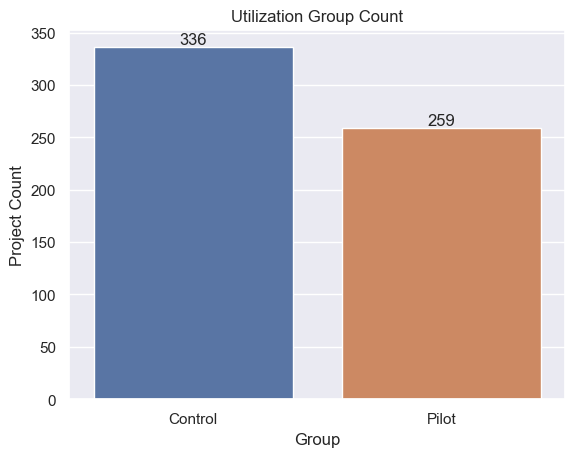

In [6]:
group_count = sns.countplot(data=utilization_df, x="isPilot")
group_count.set(xlabel='Group', ylabel = 'Project Count', title= 'Utilization Group Count')

for i in group_count.containers:
    group_count.bar_label(i,)

## Control and Pilot Analysis

> Overall HPP & DTV Quarter Statistics: Control Vs Pilot Groups

In [7]:
#HPP StatsiticsOver Quarter
HPP_df = utilization_df[utilization_df['HPP'] > 0]
HPP_df = utilization_df.groupby(['isPilot','TransCSYearQuarter'])['HPP'].agg(['count', np.sum,np.mean,np.median])
HPP_df.columns = ['project_count','HPP_sum', 'HPP_mean', 'HPP_median']
HPP_df
#DTV StatsiticsOver Quarter
DTV_df = utilization_df[utilization_df['DTV'] > 0]
DTV_df = utilization_df.groupby(['isPilot','TransCSYearQuarter'])['DTV'].agg([np.sum,np.mean,np.median])
DTV_df.columns = ['DTV_sum', 'DTV_mean', 'DTV_median']
DTV_df

hpp_dtv_overall = pd.concat([HPP_df, DTV_df], axis=1).reindex(HPP_df.index)
hpp_dtv_overall



project_count  HPP_sum   HPP_mean  HPP_median   
isPilot TransCSYearQuarter                                                  
Control 2022-4                        111  2011.56  18.122162       15.00  \
        2023-1                        225  4458.35  19.814889       15.77   
Pilot   2022-4                         95  1318.50  13.878947       10.00   
        2023-1                        164  3481.22  21.226951       15.75   

                            DTV_sum    DTV_mean  DTV_median  
isPilot TransCSYearQuarter                                   
Control 2022-4                 7512   67.675676        67.0  
        2023-1                22808  101.368889        99.0  
Pilot   2022-4                 5714   60.147368        61.0  
        2023-1                16725  101.981707        98.5

> HPP Lineplot

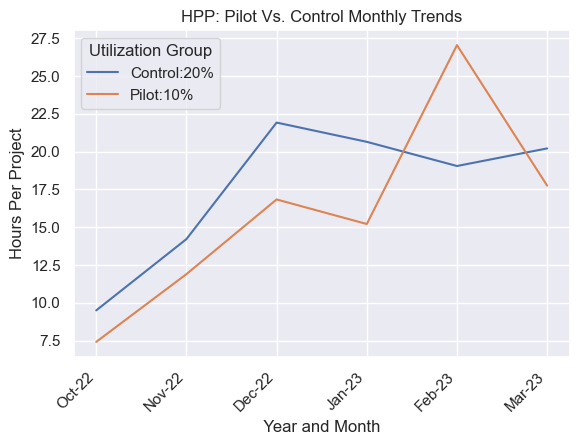

In [8]:

#Plotted with aggregated mean of y values for each x wit 95% confidence interval 
HPP_plot = sns.lineplot(data=utilization_df, x="TransCSYearMonth", y="HPP", hue='isPilot', errorbar=None)
HPP_plot.legend(title='Utilization Group', labels=['Control:20%', 'Pilot:10%'],loc = 'upper left')
HPP_plot.set(title= 'HPP: Pilot Vs. Control Monthly Trends', xlabel=' Year and Month ', ylabel='Hours Per Project')
HPP_plot.figure.autofmt_xdate(rotation=45)

> DTV Barplot

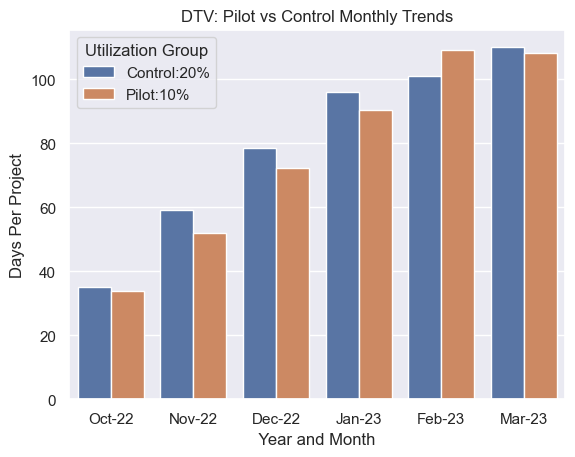

In [9]:
#Plotted with aggregated mean of y values for each x wit 95% confidence interval 
DTV_plot = sns.barplot(data=utilization_df, x="TransCSYearMonth", y="DTV", hue="isPilot", errorbar=None)
DTV_plot.set(title= 'DTV: Pilot vs Control Monthly Trends', xlabel=' Year and Month ', ylabel='Days Per Project')
DTV_plot.legend(title='Utilization Group', labels=['Control:20%', 'Pilot:10%'])



#### Coach Quarterly Productivty Statistics, derived from HPP

### Q1 2023: Activation Coach Productivity

In [10]:
hpp_coach_df_q1 = utilization_df_q1.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
hpp_coach_df_q1.columns = ['Q1_project_count', 'Q1_HPP_median', 'Q1_HPP_sum', 'Q1_HPP_mean']
hpp_coach_df_q1 = hpp_coach_df_q1.sort_values(by = ['isPilot', 'Q1_project_count'], ascending= False)
hpp_coach_df_q1


hpp_coach_df_q1

dtv_coach_df_q1 = utilization_df_q1.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_coach_df_q1.columns = ['Q1_DTV_median', 'Q1_DTV_sum', 'Q1_DTV_mean']
dtv_coach_df_q1 = dtv_coach_df_q1.sort_values(by = ['isPilot'], ascending= False)
dtv_coach_df_q1

coach_overall_q1 = pd.concat([hpp_coach_df_q1, dtv_coach_df_q1], axis=1).reindex(hpp_coach_df_q1.index)
coach_overall_q1



Q1_project_count  Q1_HPP_median  Q1_HPP_sum   
isPilot ActivationCoach                                                         
Pilot   Jenna Pingeon                            9          0.000        9.00  \
        Denzel Alexander                         8         26.750      208.00   
        Josh Frandsen                            8         24.750      156.00   
        Austin Clary                             7          9.000       80.00   
        Diego Garcia                             7         17.500      148.00   
        Nicole Kolenic                           7         11.500      107.25   
        Adam Haas                                6         40.250      249.00   
        Britney Peoples                          6         14.125       91.25   
        Samuel Burchill                          6         12.250      104.25   
        Daniel Kihm                              5         11.500       74.25   
        Kristopher Horne                         5         18.000      100.75   
        Nathaniel Rondina Alivio                 5         17.500      102.50   
        Anna Christofaro                         4         26.650       93.80   
        Christopher Doyle                        4         14.800       62.73   
        Christopher Smith                        4         46.125      304.45   
        Daniel Forester                          4         23.500       90.00   
        Monica Miller                            4         20.250       89.00   
        Annie Leidner                            3          4.000       12.25   
        Cassie Willetts                          3         26.750       83.25   
        Erin Hartnett                            3         65.250      166.50   
        Kathryn Herbst                           3         19.750       57.75   
        Ruvie Dianne Cudo                        3         24.500       79.50   
        Shweta Sahu                              3         19.000       54.50   
        Allison Hestick                          2         32.125       64.25   
        Brandy Lane                              2         88.920      177.84   
        Brett Johnson                            2          8.500       17.00   
        Cha Carlos                               2         16.150       32.30   
        Christina Chalepoudi                     2          6.125       12.25   
        Christine Bonvini                        2         37.000       74.00   
        Cynthia Mendez                           2         11.625       23.25   
        Genalin Ilustre                          2          7.125       14.25   
        Jacquelyn Wager                          2         25.300       50.60   
        Jessica Pearson                          2          3.250        6.50   
        Jonathan Catungal                        2          2.750        5.50   
        Julie Bruner                             2         44.875       89.75   
        Marcky Azarcon                           2         10.250       20.50   
        Marlo Korbel                             2         24.250       48.50   
        Abi Sweet                                1          6.500        6.50   
        Alice Whalen                             1          0.000        0.00   
        Angel Bradshaw                           1         12.750       12.75   
        Ayra Cornel                              1         12.500       12.50   
        Danielle Hegge                           1          4.750        4.75   
        Irene Ignacio                            1         16.000       16.00   
        Jaffar Mohammed Siddiqui                 1         12.000       12.00   
        Jaime Fulgosino                          1          3.000        3.00   
        Joanna Jerica Flores                     1          9.500        9.50   
        Jodi Hunt                                1         11.750       11.75   
        Lexis Julsrud-Wertjes                    1          9.000

### Q4 2022: Activation Coach Productivity

In [11]:
hpp_coach_df_q4 = utilization_df_q4.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
hpp_coach_df_q4.columns = ['Q4_project_count', 'Q4_HPP_median', 'Q4_HPP_sum', 'Q4_HPP_mean']
hpp_coach_df_q4 = hpp_coach_df_q4.sort_values(by = ['isPilot', 'Q4_project_count'], ascending= False)
hpp_coach_df_q4

dtv_coach_df_q4 = utilization_df_q4.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_coach_df_q4.columns = ['Q4_DTV_median', 'Q4_DTV_sum', 'Q4_DTV_mean']
dtv_coach_df_q4 = dtv_coach_df_q4.sort_values(by = ['isPilot'], ascending= False)
dtv_coach_df_q4

coach_overall_q4 = pd.concat([hpp_coach_df_q4, dtv_coach_df_q4], axis=1).reindex(hpp_coach_df_q4.index)
coach_overall_q4




Q4_project_count  Q4_HPP_median  Q4_HPP_sum   
isPilot ActivationCoach                                                         
Pilot   Kristopher Horne                         7         20.750      125.50  \
        Nicole Kolenic                           5         17.500       83.00   
        Anna Christofaro                         4          8.750       50.50   
        Austin Clary                             4         11.000       46.00   
        Samuel Burchill                          4          9.000       51.50   
        Adam Haas                                3         22.250       80.50   
        Charlene Bystrom                         3         16.250       44.50   
        Jaffar Mohammed Siddiqui                 3          7.500       20.00   
        Josh Frandsen                            3          6.500       19.00   
        Michele Testi                            3         11.500       36.50   
        Abi Sweet                                2          6.000       12.00   
        Akilesh R                                2         11.625       23.25   
        Angel Bradshaw                           2         12.750       25.50   
        Annie Leidner                            2          4.625        9.25   
        Britney Peoples                          2         12.375       24.75   
        Cassie Willetts                          2         21.500       43.00   
        Christine Bonvini                        2         17.250       34.50   
        Daniel Kihm                              2         14.500       29.00   
        Denzel Alexander                         2         14.500       29.00   
        Diego Garcia                             2         20.500       41.00   
        Gerick Kean Lumapak                      2         10.750       21.50   
        Lexis Julsrud-Wertjes                    2          5.875       11.75   
        Marcky Azarcon                           2         42.750       85.50   
        Marlo Korbel                             2         46.125       92.25   
        Monica Miller                            2         22.000       44.00   
        Nathaniel Rondina Alivio                 2         12.500       25.00   
        Prisilla Paul                            2          7.000       14.00   
        Valerie Tema                             2         35.375       70.75   
        Yuri Alfante                             2          6.875       13.75   
        Alex Mavros                              1         10.000       10.00   
        Alexis Blue                              1          4.750        4.75   
        Alyssa Gray                              1          1.750        1.75   
        Anita Verma                              1          3.500        3.50   
        Christina Chalepoudi                     1          4.000        4.00   
        Danielle Hegge                           1          5.000        5.00   
        Ian Pajarillo                            1         12.500       12.50   
        Joanna Jerica Flores                     1          4.500        4.50   
        Jonathan Catungal                        1          2.000        2.00   
        Julie Bruner                             1          3.250        3.25   
        Kacie Johnson                            1          4.500        4.50   
        Kyle Comer                               1         21.000       21.00   
        Lance Williams                           1          7.000        7.00   
        PJ Schoeny                               1          0.000        0.00   
        Peter Griganavicius                      1          6.500        6.50   
        Rizwana Bellary Kolmi                    1          9.000        9.00   
        Sasidhar Swarna                          1          5.500        5.50   
        Tracy Jahner                             1          7.000        7.00   
Control Alexis Blue                              5          9.000

# Part 2 Activation Experience: Pilot Vs. Control

### Activity Experience Distribution Check

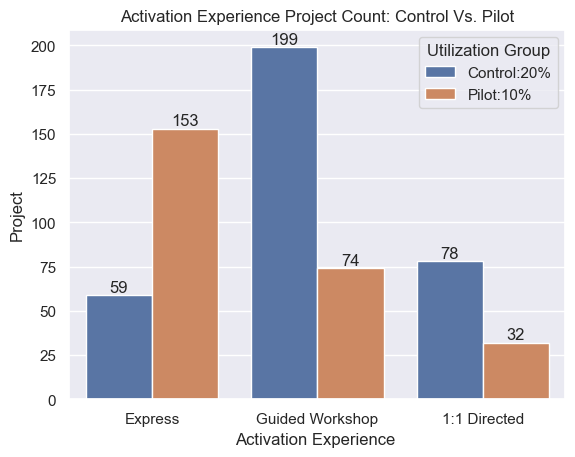

In [12]:
experience_count = sns.countplot(data=utilization_df, x="ActivationExperience", hue='isPilot')
experience_count.legend(title='Utilization Group', labels=['Control:20%', 'Pilot:10%'],loc = 'upper right')
experience_count.set(title= 'Activation Experience Project Count: Control Vs. Pilot', xlabel='Activation Experience ', ylabel='Project')

for i in experience_count.containers:
    experience_count.bar_label(i,)

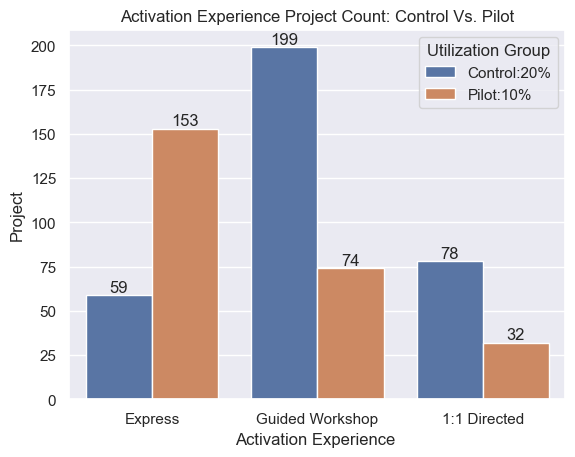

In [13]:
experience_count = sns.countplot(data=utilization_df, x="ActivationExperience", hue='isPilot')
experience_count.legend(title='Utilization Group', labels=['Control:20%', 'Pilot:10%'],loc = 'upper right')
experience_count.set(title= 'Activation Experience Project Count: Control Vs. Pilot', xlabel='Activation Experience ', ylabel='Project')

for i in experience_count.containers:
    experience_count.bar_label(i,)

### Activation Experience: Overall Group Statistics

In [14]:
#HPP StatsiticsOver Quarter
experience_df_q1 = utilization_df_q1.groupby(['isPilot', 'ActivationExperience'])['HPP'].agg(['count','median','sum','mean'])
experience_df_q1.columns = ['Q1_project_count','Q1_HPP_median', 'Q1_HPP_sum', 'Q1_HPP_mean']
experience_df_q1 = experience_df_q1.sort_values(by = ['isPilot', 'ActivationExperience'], ascending= False)
#DTV StatsiticsOver Quarter
dtv_experience_df_q1 = utilization_df_q1.groupby(['isPilot', 'ActivationExperience'])['DTV'].agg(['median','sum','mean'])
dtv_experience_df_q1.columns = [ 'Q1_DTV_median', 'Q1_DTV_sum', 'Q1_DTV_mean']
dtv_experience_df_q1 = dtv_experience_df_q1.sort_values(by = ['isPilot'], ascending= False)
dtv_experience_df_q1


exerience_hpp_dtv_overall = pd.concat([experience_df_q1, dtv_experience_df_q1], axis=1).reindex(experience_df_q1.index)
exerience_hpp_dtv_overall



Q1_project_count  Q1_HPP_median  Q1_HPP_sum   
isPilot ActivationExperience                                                
Pilot   Guided Workshop                     56         22.500     1335.30  \
        Express                             83          9.750      980.80   
        1:1 Directed                        25         34.250     1165.12   
Control Guided Workshop                    138         13.575     2394.14   
        Express                             36         13.775      608.90   
        1:1 Directed                        51         24.000     1455.31   

                              Q1_HPP_mean  Q1_DTV_median  Q1_DTV_sum   
isPilot ActivationExperience                                           
Pilot   Guided Workshop         23.844643           98.5        5724  \
        Express                 11.816867           93.0        8091   
        1:1 Directed            46.604800          128.0        2910   
Control Guided Workshop         17.348841           89.0       13458   
        Express                 16.913889          103.0        3714   
        1:1 Directed            28.535490          111.0        5636   

                              Q1_DTV_mean  
isPilot ActivationExperience               
Pilot   Guided Workshop        102.214286  
        Express                 97.481928  
        1:1 Directed           116.400000  
Control Guided Workshop         97.521739  
        Express                103.166667  
        1:1 Directed           110.509804

In [15]:
#HPP StatsiticsOver Quarter
experience_df_q4 = utilization_df_q4.groupby(['isPilot', 'ActivationExperience'])['HPP'].agg(['count','median','sum','mean'])
experience_df_q4.columns = ['Q4_project_count','Q4_HPP_median', 'Q4_HPP_sum', 'Q4_HPP_mean']
experience_df_q4 = experience_df_q4.sort_values(by = ['isPilot', 'ActivationExperience'], ascending= False)
#DTV StatsiticsOver Quarter
dtv_experience_df_q4 = utilization_df_q4.groupby(['isPilot', 'ActivationExperience'])['DTV'].agg(['median','sum','mean'])
dtv_experience_df_q4.columns = [ 'Q4_DTV_median', 'Q4_DTV_sum', 'Q4_DTV_mean']
dtv_experience_df_q4 = dtv_experience_df_q4.sort_values(by = ['isPilot'], ascending= False)
dtv_experience_df_q4


exerience_hpp_dtv_overall4 = pd.concat([experience_df_q4, dtv_experience_df_q4], axis=1).reindex(experience_df_q4.index)
exerience_hpp_dtv_overall4

Q4_project_count  Q4_HPP_median  Q4_HPP_sum   
isPilot ActivationExperience                                                
Pilot   Guided Workshop                     18          22.00      406.00  \
        Express                             70           8.25      744.25   
        1:1 Directed                         7          22.25      168.25   
Control Guided Workshop                     61          15.00     1019.41   
        Express                             23          11.00      252.65   
        1:1 Directed                        27          25.00      739.50   

                              Q4_HPP_mean  Q4_DTV_median  Q4_DTV_sum   
isPilot ActivationExperience                                           
Pilot   Guided Workshop         22.555556           63.5        1168  \
        Express                 10.632143           56.0        4089   
        1:1 Directed            24.035714           69.0         457   
Control Guided Workshop         16.711639           65.0        4113   
        Express                 10.984783           51.0        1396   
        1:1 Directed            27.388889           81.0        2003   

                              Q4_DTV_mean  
isPilot ActivationExperience               
Pilot   Guided Workshop         64.888889  
        Express                 58.414286  
        1:1 Directed            65.285714  
Control Guided Workshop         67.426230  
        Express                 60.695652  
        1:1 Directed            74.185185

### Activation Experience: HPP

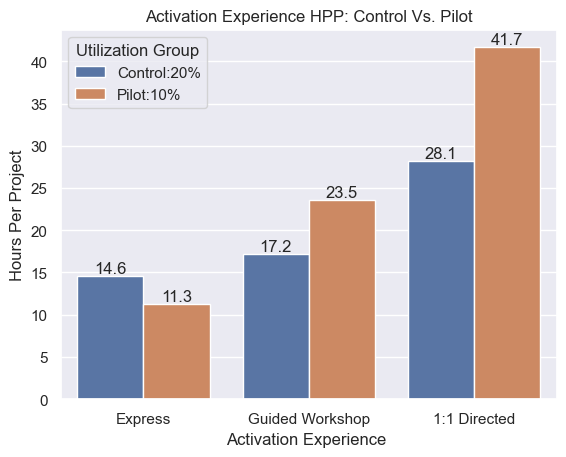

In [16]:
HPP_experience_plot = sns.barplot(data=utilization_df, x="ActivationExperience", y="HPP", hue='isPilot', errorbar=None)
HPP_experience_plot.legend(title='Utilization Group', labels=['Control:20%', 'Pilot:10%'],loc = 'upper left')
HPP_experience_plot.set(title= 'Activation Experience HPP: Control Vs. Pilot', xlabel='Activation Experience ', ylabel='Hours Per Project')
for i in HPP_experience_plot.containers:
    HPP_experience_plot.bar_label(i,fmt= '%.1f')



### Activation Experience: DTV 

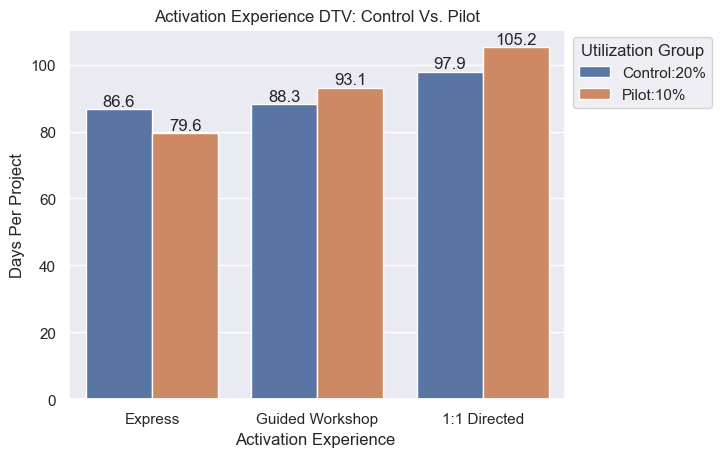

In [17]:
DTV_experience_plot = sns.barplot(data=utilization_df, x="ActivationExperience", y="DTV", hue='isPilot', errorbar=None)
DTV_experience_plot.legend(title='Utilization Group', labels=['Control:20%', 'Pilot:10%'],bbox_to_anchor=(1, 1))
DTV_experience_plot.set(title= 'Activation Experience DTV: Control Vs. Pilot', xlabel='Activation Experience ', ylabel='Days Per Project')

for i in DTV_experience_plot.containers:
    DTV_experience_plot.bar_label(i,fmt= '%.1f')

### Activation Experience: Activation Coach Productivity

#### Q4 2022 Tables

In [18]:
express_df_q4 = utilization_df_q4[utilization_df_q4['ActivationExperience']== 'Express']
express_df_q4 = express_df_q4.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
express_df_q4.columns = ['express_project_count','express_HPP_median', 'express_HPP_sum', 'express_HPP_mean']
express_df_q4 = express_df_q4.sort_values(by = ['isPilot', 'express_project_count'], ascending= False)
express_df_q4

dtv_express_df_q4 = utilization_df_q4.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_express_df_q4.columns = ['express_DTV_median', 'express_DTV_sum', 'express_DTV_mean']
dtv_express_df_q4 = dtv_express_df_q4.sort_values(by = ['isPilot'], ascending= False)
dtv_express_df_q4

express_overall_q4 = pd.concat([express_df_q4, dtv_express_df_q4], axis=1).reindex(express_df_q4.index)
express_overall_q4



express_project_count  express_HPP_median   
isPilot ActivationCoach                                                       
Pilot   Kristopher Horne                            4.0              10.000  \
        Nicole Kolenic                              4.0              17.500   
        Austin Clary                                3.0              11.000   
        Charlene Bystrom                            3.0              16.250   
        Jaffar Mohammed Siddiqui                    3.0               7.500   
        Michele Testi                               3.0              11.500   
        Samuel Burchill                             3.0               9.000   
        Abi Sweet                                   2.0               6.000   
        Akilesh R                                   2.0              11.625   
        Angel Bradshaw                              2.0              12.750   
        Annie Leidner                               2.0               4.625   
        Britney Peoples                             2.0              12.375   
        Diego Garcia                                2.0              20.500   
        Gerick Kean Lumapak                         2.0              10.750   
        Josh Frandsen                               2.0               4.000   
        Lexis Julsrud-Wertjes                       2.0               5.875   
        Marcky Azarcon                              2.0              42.750   
        Nathaniel Rondina Alivio                    2.0              12.500   
        Prisilla Paul                               2.0               7.000   
        Yuri Alfante                                2.0               6.875   
        Alex Mavros                                 1.0              10.000   
        Alexis Blue                                 1.0               4.750   
        Alyssa Gray                                 1.0               1.750   
        Anita Verma                                 1.0               3.500   
        Anna Christofaro                            1.0               5.500   
        Cassie Willetts                             1.0              31.000   
        Christina Chalepoudi                        1.0               4.000   
        Daniel Kihm                                 1.0               3.500   
        Danielle Hegge                              1.0               5.000   
        Ian Pajarillo                               1.0              12.500   
        Joanna Jerica Flores                        1.0               4.500   
        Jonathan Catungal                           1.0               2.000   
        Julie Bruner                                1.0               3.250   
        Kacie Johnson                               1.0               4.500   
        Kyle Comer                                  1.0              21.000   
        Lance Williams                              1.0               7.000   
        PJ Schoeny                                  1.0               0.000   
        Peter Griganavicius                         1.0               6.500   
        Rizwana Bellary Kolmi                       1.0               9.000   
        Sasidhar Swarna                             1.0               5.500   
        Tracy Jahner                                1.0               7.000   
Control Diego Garcia                                4.0              15.250   
        Anita Verma                                 2.0              10.450   
        Joanna Jerica Flores                        2.0              16.625   
        Rizwana Bellary Kolmi                       2.0              12.000   
        Angel Bradshaw                              1.0               6.250   
        Ben Boddy                                   1.0              15.000   
        Danielle Hegge                              1.0               4.000   
        Ferdie Malapit                              1.0               7.500   
     

In [19]:
guided_df_q4 = utilization_df_q4[utilization_df_q4['ActivationExperience']== 'Guided Workshop']
guided_df_q4 = guided_df_q4.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
guided_df_q4.columns = ['guided_project_count','guided_HPP_median', 'guided_HPP_sum', 'guided_HPP_mean']
guided_df_q4 = guided_df_q4.sort_values(by = ['isPilot', 'guided_project_count'], ascending= False)

dtv_guided_df_q4 = utilization_df_q4.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_guided_df_q4.columns = ['guided_DTV_median', 'guided_DTV_sum', 'guided_DTV_mean']
dtv_guided_df_q4 = dtv_guided_df_q4.sort_values(by = ['isPilot'], ascending= False)

guided_overall_df_q4 = pd.concat([guided_df_q4, dtv_guided_df_q4], axis=1).reindex(guided_df_q4.index)
guided_overall_df_q4



guided_project_count  guided_HPP_median   
isPilot ActivationCoach                                                     
Pilot   Kristopher Horne                           3.0             22.000  \
        Christine Bonvini                          2.0             17.250   
        Denzel Alexander                           2.0             14.500   
        Marlo Korbel                               2.0             46.125   
        Monica Miller                              2.0             22.000   
        Anna Christofaro                           1.0              9.000   
        Austin Clary                               1.0             11.000   
        Cassie Willetts                            1.0             12.000   
        Daniel Kihm                                1.0             25.500   
        Nicole Kolenic                             1.0             17.500   
        Samuel Burchill                            1.0             28.500   
        Valerie Tema                               1.0             30.000   
Control Jaffar Mohammed Siddiqui                   4.0             23.000   
        Alexis Blue                                3.0              9.750   
        Annie Leidner                              3.0              8.000   
        Rizwana Bellary Kolmi                      3.0             13.000   
        Rose Platon                                3.0              6.000   
        Shankaran Pantula                          3.0             29.250   
        Alisa DiGeronimo                           2.0             17.500   
        Anita Verma                                2.0             16.100   
        Glenda Servidad                            2.0             40.375   
        Jaime Fulgosino                            2.0              6.000   
        Jessica Pearson                            2.0             11.625   
        Jose Remeterio Jr.                         2.0             12.750   
        Kyle Comer                                 2.0              7.750   
        Leslia Fernandes Barnes                    2.0             14.625   
        Lexis Julsrud-Wertjes                      2.0             13.000   
        Michele Testi                              2.0              8.500   
        Akilesh R                                  1.0             27.250   
        Ayra Cornel                                1.0             16.000   
        Barbara Davis                              1.0             19.500   
        Brett Johnson                              1.0             16.000   
        Caren Lea Davis                            1.0             10.010   
        Christian Schlaefer                        1.0             22.000   
        Danielle Hegge                             1.0             11.750   
        James Tettmar                              1.0              4.500   
        Jessica Colley                             1.0             14.000   
        John DePuy                                 1.0              0.000   
        Jonathon Waters                            1.0             32.500   
        Lizzie Bolton                              1.0             11.000   
        Paul Walker                                1.0             29.000   
        Prisilla Paul                              1.0             16.000   
        Sarah Dastas                               1.0             32.000   
        Seerat Dhawan                              1.0             10.250   
        Seth Bresky                                1.0             15.750   
        Shannon Santopietro                        1.0             20.750   
        Stephanie Castor                           1.0             20.000   
        Sujay Sanjeev                              1.0             46.500   
        Tina Harris                                1.0             32.000   
        Tracy Jahner                               1.0             20.250   

                             

In [20]:
oneonone_df_q4 = utilization_df_q4[utilization_df_q4['ActivationExperience']== '1:1 Directed']
oneonone_df_q4 = oneonone_df_q4.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
oneonone_df_q4.columns = ['oneonone_project_count','oneonone_HPP_median', 'oneonone_HPP_sum', 'oneonone_HPP_mean']
oneonone_df_q4 = oneonone_df_q4.sort_values(by = ['isPilot', 'oneonone_project_count'], ascending= False)
oneonone_df_q4

dtv_oneonone_df_q4 = utilization_df_q4.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_oneonone_df_q4.columns = ['oneonone_DTV_median', 'oneonone_DTV_sum', 'oneonone_DTV_mean']
dtv_oneonone_df_q4 = dtv_oneonone_df_q4.sort_values(by = ['isPilot'], ascending= False)
dtv_oneonone_df_q4

oneonone_overall_df_q4 = pd.concat([oneonone_df_q4, dtv_oneonone_df_q4], axis=1).reindex(oneonone_df_q4.index)
oneonone_overall_df_q4




oneonone_project_count  oneonone_HPP_median   
isPilot ActivationCoach                                                 
Pilot   Adam Haas                            3.0               22.250  \
        Anna Christofaro                     2.0               18.000   
        Josh Frandsen                        1.0               11.000   
        Valerie Tema                         1.0               40.750   
Control Kokila Raj                           3.0               49.000   
        Alexis Blue                          2.0                6.500   
        Annie Leidner                        2.0                8.875   
        Brett Johnson                        2.0               26.000   
        Lynae Peterson                       2.0               41.125   
        Ouafaa Chaouki                       2.0               49.250   
        PJ Schoeny                           2.0                1.750   
        Prisilla Paul                        2.0               16.125   
        Amiel Dela Rosa                      1.0               16.500   
        Anita Verma                          1.0               11.000   
        Barbara Davis                        1.0               27.250   
        Elwel Gardaya                        1.0               49.500   
        Harika Voota                         1.0               43.500   
        Jes Gilman                           1.0               16.500   
        Ken Sterner                          1.0               36.250   
        Maggi Manoukian                      1.0               25.000   
        Michele Testi                        1.0               27.000   
        Sue Medeiros                         1.0               39.250   

                          oneonone_HPP_sum  oneonone_HPP_mean   
isPilot ActivationCoach                                         
Pilot   Adam Haas                    80.50          26.833333  \
        Anna Christofaro             36.00          18.000000   
        Josh Frandsen                11.00          11.000000   
        Valerie Tema                 40.75          40.750000   
Control Kokila Raj                  148.50          49.500000   
        Alexis Blue                  13.00           6.500000   
        Annie Leidner                17.75           8.875000   
        Brett Johnson                52.00          26.000000   
        Lynae Peterson               82.25          41.125000   
        Ouafaa Chaouki               98.50          49.250000   
        PJ Schoeny                    3.50           1.750000   
        Prisilla Paul                32.25          16.125000   
        Amiel Dela Rosa              16.50          16.500000   
        Anita Verma                  11.00          11.000000   
        Barbara Davis                27.25          27.250000   
        Elwel Gardaya                49.50          49.500000   
        Harika Voota                 43.50          43.500000   
        Jes Gilman                   16.50          16.500000   
        Ken Sterner                  36.25          36.250000   
        Maggi Manoukian              25.00          25.000000   
        Michele Testi                27.00          27.000000   
        Sue Medeiros                 39.25          39.250000   

                          oneonone_DTV_median  oneonone_DTV_sum   
isPilot ActivationCoach                                           
Pilot   Adam Haas                        69.0               183  \
        Anna Christofaro                 61.5               247   
        Josh Frandsen                    69.0               191   
        Valerie Tema                     90.5               181   
Control Kokila Raj                       94.0               278   
        Alexis Blue                      48.0               259   
        Annie Leidner                    51.0               299   
        Brett Johnson                    83.0               247   
        Lynae Peterson                  10

### Q1 2023 Tables

In [21]:
express_df_q1 = utilization_df_q1[utilization_df_q1['ActivationExperience']== 'Express']
express_df_q1 = express_df_q1.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
express_df_q1.columns = ['express_project_count','express_HPP_median', 'express_HPP_sum', 'express_HPP_mean']
express_df_q1 = express_df_q1.sort_values(by = ['isPilot', 'express_project_count'], ascending= False)


dtv_express_df_q1 = utilization_df_q1.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_express_df_q1.columns = ['express_DTV_median', 'express_DTV_sum', 'express_DTV_mean']
dtv_express_df_q1 = dtv_express_df_q1.sort_values(by = ['isPilot'], ascending= False)


express_overall_q1 = pd.concat([express_df_q1, dtv_express_df_q1], axis=1).reindex(express_df_q1.index)
express_overall_q1 



express_project_count  express_HPP_median   
isPilot ActivationCoach                                                       
Pilot   Jenna Pingeon                               9.0               0.000  \
        Diego Garcia                                7.0              17.500   
        Nathaniel Rondina Alivio                    5.0              17.500   
        Britney Peoples                             4.0              12.250   
        Kristopher Horne                            4.0              16.000   
        Annie Leidner                               3.0               4.000   
        Daniel Kihm                                 3.0               6.000   
        Josh Frandsen                               3.0               4.000   
        Nicole Kolenic                              3.0              10.500   
        Ruvie Dianne Cudo                           3.0              24.500   
        Samuel Burchill                             3.0              12.250   
        Shweta Sahu                                 3.0              19.000   
        Austin Clary                                2.0              15.000   
        Brett Johnson                               2.0               8.500   
        Cha Carlos                                  2.0              16.150   
        Christina Chalepoudi                        2.0               6.125   
        Genalin Ilustre                             2.0               7.125   
        Jessica Pearson                             2.0               3.250   
        Jonathan Catungal                           2.0               2.750   
        Marcky Azarcon                              2.0              10.250   
        Abi Sweet                                   1.0               6.500   
        Angel Bradshaw                              1.0              12.750   
        Ayra Cornel                                 1.0              12.500   
        Cassie Willetts                             1.0              26.750   
        Danielle Hegge                              1.0               4.750   
        Irene Ignacio                               1.0              16.000   
        Jaffar Mohammed Siddiqui                    1.0              12.000   
        Jaime Fulgosino                             1.0               3.000   
        Joanna Jerica Flores                        1.0               9.500   
        Jodi Hunt                                   1.0              11.750   
        Lexis Julsrud-Wertjes                       1.0               9.000   
        Nadia Archambault                           1.0              10.000   
        Naomi Hacking                               1.0               0.000   
        Peter Griganavicius                         1.0               9.750   
        Ray Hammond                                 1.0               0.000   
        Rose Platon                                 1.0               2.000   
        Yuri Alfante                                1.0               9.750   
Control Mayell Tabor                                3.0              18.000   
        Danielle Hegge                              2.0               7.875   
        Diego Garcia                                2.0              21.500   
        Lexis Julsrud-Wertjes                       2.0              10.750   
        Michele Testi                               2.0              16.000   
        Nathaniel Rondina Alivio                    2.0              10.250   
        Paul Walker                                 2.0               8.500   
        Tariq Mohammed Mehkri                       2.0               7.375   
        Akilesh R                                   1.0              32.000   
        Andrew Lee                                  1.0              51.250   
        Cha Carlos                                  1.0              21.100   
        Chloe Barnes                                1.0              25.500   
     

In [22]:
guided_df_q1 = utilization_df_q1[utilization_df_q1['ActivationExperience']== 'Guided Workshop']
guided_df_q1 = guided_df_q1.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
guided_df_q1.columns = ['guided_project_count','guided_HPP_median', 'guided_HPP_sum', 'guided_HPP_mean']
guided_df_q1 = guided_df_q1.sort_values(by = ['isPilot', 'guided_project_count'], ascending= False)

dtv_guided_df_q1 = utilization_df_q1.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_guided_df_q1.columns = ['guided_DTV_median', 'guided_DTV_sum', 'guided_DTV_mean']
dtv_guided_df_q1 = dtv_guided_df_q1.sort_values(by = ['isPilot'], ascending= False)

guided_overall_df_q1 = pd.concat([guided_df_q1, dtv_guided_df_q1], axis=1).reindex(guided_df_q1.index)
guided_overall_df_q1



guided_project_count  guided_HPP_median   
isPilot ActivationCoach                                                    
Pilot   Adam Haas                                 5.0             43.750  \
        Denzel Alexander                          5.0             17.750   
        Austin Clary                              4.0              7.000   
        Monica Miller                             4.0             20.250   
        Nicole Kolenic                            4.0             13.750   
        Anna Christofaro                          3.0             23.300   
        Erin Hartnett                             3.0             65.250   
        Josh Frandsen                             3.0             25.000   
        Kathryn Herbst                            3.0             19.750   
        Allison Hestick                           2.0             32.125   
        Britney Peoples                           2.0             18.250   
        Cassie Willetts                           2.0             28.250   
        Christine Bonvini                         2.0             37.000   
        Christopher Doyle                         2.0             12.125   
        Cynthia Mendez                            2.0             11.625   
        Daniel Forester                           2.0             23.500   
        Daniel Kihm                               2.0             25.375   
        Marlo Korbel                              2.0             24.250   
        Samuel Burchill                           2.0             12.125   
        Julie Bruner                              1.0             10.500   
        Kristopher Horne                          1.0             25.250   
Control Jessica Pearson                           8.0             17.500   
        Paul Walker                               6.0              9.000   
        Seth Bresky                               6.0             11.750   
        Alexander Agbaglud                        4.0             16.310   
        Cha Carlos                                4.0             18.525   
        Danielle Hegge                            4.0              9.250   
        Jenny Nollen                              4.0             12.500   
        Jonathan Catungal                         4.0              5.750   
        Lexis Julsrud-Wertjes                     4.0             14.375   
        Lindsey Tibbs                             4.0             12.250   
        Rizwana Bellary Kolmi                     4.0             18.125   
        Rose Platon                               4.0              9.625   
        Tracy Jahner                              4.0             13.250   
        Anita Verma                               3.0              9.750   
        Hosam Al-khalayleh                        3.0             17.500   
        Jaime Fulgosino                           3.0              5.500   
        Jonathon Waters                           3.0             30.000   
        Kayla Shreve                              3.0             13.000   
        Leslia Fernandes Barnes                   3.0             17.000   
        Lizzie Bolton                             3.0             10.000   
        Sherelin S                                3.0             12.500   
        Abi Sweet                                 2.0             15.750   
        Alisa DiGeronimo                          2.0             19.250   
        Amiel Dela Rosa                           2.0              7.500   
        Angel Bradshaw                            2.0             27.125   
        Ben Boddy                                 2.0             16.500   
        Caren Lea Davis                           2.0             28.000   
        Christian Schlaefer                       2.0             13.250   
        Grace Westlake                            2.0             23.000   
        Kokila Raj                                2.0             17.375   
     

In [23]:
oneonone_df_q1 = utilization_df_q1[utilization_df_q1['ActivationExperience']== '1:1 Directed']
oneonone_df_q1 = oneonone_df_q1.groupby(['isPilot', 'ActivationCoach'])['HPP'].agg(['count','median','sum','mean'])
oneonone_df_q1.columns = ['oneonone_project_count','oneonone_HPP_median', 'oneonone_HPP_sum', 'oneonone_HPP_mean']
oneonone_df_q1 = oneonone_df_q1.sort_values(by = ['isPilot', 'oneonone_project_count'], ascending= False)
oneonone_df_q1

dtv_oneonone_df_q1 = utilization_df_q1.groupby(['isPilot', 'ActivationCoach'])['DTV'].agg(['median','sum','mean'])
dtv_oneonone_df_q1.columns = ['oneonone_DTV_median', 'oneonone_DTV_sum', 'oneonone_DTV_mean']
dtv_oneonone_df_q1 = dtv_oneonone_df_q1.sort_values(by = ['isPilot'], ascending= False)
dtv_oneonone_df_q1

oneonone_overall_df_q1 = pd.concat([oneonone_df_q1, dtv_oneonone_df_q1], axis=1).reindex(oneonone_df_q1.index)

oneonone_overall_df_q1



oneonone_project_count  oneonone_HPP_median   
isPilot ActivationCoach                                                        
Pilot   Christopher Smith                           4.0               46.125  \
        Denzel Alexander                            3.0               34.250   
        Brandy Lane                                 2.0               88.920   
        Christopher Doyle                           2.0               19.240   
        Daniel Forester                             2.0               21.500   
        Jacquelyn Wager                             2.0               25.300   
        Josh Frandsen                               2.0               29.250   
        Adam Haas                                   1.0               31.250   
        Alice Whalen                                1.0                0.000   
        Anna Christofaro                            1.0               37.500   
        Austin Clary                                1.0               12.000   
        Julie Bruner                                1.0               79.250   
        Odalys Marinas                              1.0              157.000   
        Richard Needham                             1.0               34.500   
        Samuel Burchill                             1.0               35.000   
Control Christian Schlaefer                         3.0                8.750   
        Cindy Schafer                               3.0               18.500   
        Nicole Pulido                               3.0               35.500   
        Paul Walker                                 3.0               18.000   
        Brett Johnson                               2.0               36.000   
        Diana Chris Mantua                          2.0               31.500   
        Mary Fahey                                  2.0               16.500   
        Michael Rezler                              2.0               31.125   
        Shannon Santopietro                         2.0               24.625   
        Tina Harris                                 2.0               49.500   
        Alexander Agbaglud                          1.0               40.010   
        Angela Armstrong                            1.0               31.750   
        Ayra Cornel                                 1.0               19.000   
        Caren Lea Davis                             1.0               40.000   
        Danielle Hegge                              1.0                5.750   
        Elise Schroepfer                            1.0               44.250   
        Elwel Gardaya                               1.0               29.750   
        Harika Voota                                1.0               18.500   
        Joanna Jerica Flores                        1.0               15.500   
        Justin Smith                                1.0               18.000   
        Justin Steabner                             1.0               41.550   
        Kayla Shreve                                1.0               41.250   
        Ken Sterner                                 1.0               24.000   
        Kevin Lamb                                  1.0               14.750   
        Leslia Fernandes Barnes                     1.0               47.000   
        Lisa Lawson                                 1.0               76.800   
        Mi Richie Forio                             1.0               21.750   
        Michele Testi                               1.0               17.000   
        Ouafaa Chaouki                              1.0               58.500   
        PJ Schoeny                                  1.0                5.000   
        Rajiv Raj                                   1.0               52.000   
        Rizwana Bellary Kolmi                       1.0               18.250   
        Rynal Stanley                               1.0                7.500   
        Sara Beth Vilbig         